In [0]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
import re
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score ,confusion_matrix

import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive


In [0]:
with open('/gdrive/My Drive/foo.txt', 'w') as f:
  f.write('Hello Google Drive!')
!cat '/gdrive/My Drive/foo.txt'

Hello Google Drive!

In [0]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


In [0]:
import pandas as pd
import zipfile

zf = zipfile.ZipFile('/gdrive/My Drive/Colab Notebooks/data/nlp_project_ga_data.zip') 
news = pd.read_csv(zf.open('uci-news-aggregator.csv'))

In [0]:
news.head()

,ID,TITLE,URL,PUBLISHER,CATEGORY,STORY,HOSTNAME,TIMESTAMP
0,1,"Fed official says weak data caused by weather,...",http://www.latimes.com/business/money/la-fi-mo...,Los Angeles Times,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.latimes.com,1394470370698
1,2,Fed's Charles Plosser sees high bar for change...,http://www.livemint.com/Politics/H2EvwJSK2VE6O...,Livemint,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.livemint.com,1394470371207
2,3,US open: Stocks fall after Fed official hints ...,http://www.ifamagazine.com/news/us-open-stocks...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1394470371550
3,4,"Fed risks falling 'behind the curve', Charles ...",http://www.ifamagazine.com/news/fed-risks-fall...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1394470371793
4,5,Fed's Plosser: Nasty Weather Has Curbed Job Gr...,http://www.moneynews.com/Economy/federal-reser...,Moneynews,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.moneynews.com,1394470372027


In [0]:
news.shape

(422419, 8)

In [0]:
news = news[['TITLE', 'CATEGORY']]

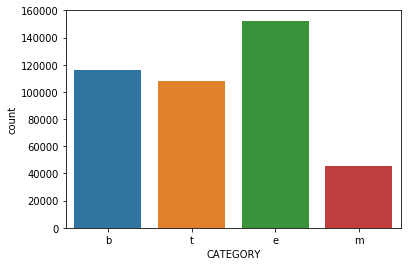

In [0]:
sns.countplot(news['CATEGORY'])
plt.show()

In [0]:
news['CATEGORY'].value_counts()

e    152469
b    115967
t    108344
m     45639
Name: CATEGORY, dtype: int64

In [0]:
stop = set(stopwords.words('english'))

In [0]:
len(stop)

179

In [0]:
news.TITLE = news.TITLE.apply(lambda x : re.sub("[^a-zA-Z]", " ", x))

In [0]:
news.TITLE = news.TITLE.apply(lambda x : x.lower())

In [0]:
news.TITLE.head()

0    fed official says weak data caused by weather ...
1    fed s charles plosser sees high bar for change...
2    us open  stocks fall after fed official hints ...
3    fed risks falling  behind the curve   charles ...
4    fed s plosser  nasty weather has curbed job gr...
Name: TITLE, dtype: object

In [0]:
news.TITLE =  news.TITLE.apply(lambda x : [i for i in x.split() if i not in stop])

In [0]:
news.TITLE = news.TITLE.apply(lambda x : ' '.join(x))

In [0]:
news.TITLE.head()

0    fed official says weak data caused weather slo...
1    fed charles plosser sees high bar change pace ...
2    us open stocks fall fed official hints acceler...
3    fed risks falling behind curve charles plosser...
4          fed plosser nasty weather curbed job growth
Name: TITLE, dtype: object

In [0]:
X_train, X_test, y_train, y_test = train_test_split(news['TITLE'], news['CATEGORY'], test_size=.2, random_state=3)

In [0]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((337935,), (84484,), (337935,), (84484,))

In [0]:
count_vectorizer  = CountVectorizer()

In [0]:
tfidf_vectorizer  = TfidfVectorizer(ngram_range=(1,3))

In [0]:
X_train_count = count_vectorizer.fit_transform(X_train)

In [0]:
X_test_count = count_vectorizer.transform(X_test)

In [0]:
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [0]:
X_train_tfidf.shape, X_test_tfidf.shape, X_train_count.shape, X_test_count.shape

((337935, 1985947), (84484, 1985947), (337935, 45942), (84484, 45942))

In [0]:
nb_1 = MultinomialNB()
nb_2 = MultinomialNB()

In [0]:
nb_1.fit(X_train_count, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [0]:
nb_2.fit(X_train_tfidf, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [0]:
acc_count_nb = accuracy_score(nb_1.predict(X_test_count), y_test)

In [0]:
acc_tfidf_nb = accuracy_score(nb_2.predict(X_test_tfidf), y_test)

In [0]:
acc_count_nb, acc_tfidf_nb

(0.9268618910089484, 0.9323895648880262)

In [0]:

# Code ends here

#Task 4 - Predicting with Multinomial Naive Bayes
# Code starts here

# initialize multinomial naive bayes
logreg_1 = OneVsRestClassifier(LogisticRegression(random_state=10))
logreg_2 = OneVsRestClassifier(LogisticRegression(random_state=10))

# fit on count vectorizer training data
logreg_1.fit(X_train_count, y_train)
# fit on tfidf vectorizer training data
logreg_2.fit(X_train_tfidf, y_train)

# accuracy with count vectorizer
acc_count_logreg  = accuracy_score(logreg_1.predict(X_test_count), y_test)

# accuracy with tfidf vectorizer
acc_tfidf_logreg  = accuracy_score(logreg_2.predict(X_test_tfidf), y_test)

# display accuracies
print("CountVectorizer Accuracy : {}, TF-IDF Accuracy : {} with Naive Bayes".format(acc_count_logreg, acc_tfidf_logreg))


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


CountVectorizer Accuracy : 0.9464750722030207, TF-IDF Accuracy : 0.9428649211685053 with Naive Bayes
